# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # for Image Augmentation and data preprocessing


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_dir = './dataset/training_set' #the same folder with the ipynb

#  define the Image Augmentation method 
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to the range [0, 1]
    horizontal_flip=True,   # flip the image horizontally
    rotation_range=30,       # rotate image [-30, 30]
    zoom_range=0.2,        # zoom in/out the image [0.8, 1.2]
    shear_range=0.2,       # random shear transformations
    
    
)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # make the images same size
    batch_size=32,         # process in batches
    class_mode='binary'    # binary classification task
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_dir = './dataset/test_set'

test_datagen = ImageDataGenerator(rescale=1./255)  # testing doesn't need improveing generalization

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()


### Step 1 - Convolution

In [5]:
# Add a Conv2D layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#input 64x64 pixel ,rgb channels


C:\Users\lxb\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# pick the Max number in each 2x2 pool, move 2 pixels each time

### Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


### Step 3 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())


### Step 4 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


### Step 5 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  
# binary classification, usually use sigmoid as activation function

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# how the weights update,  how to calculate error,   how to evaluate the performance

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
cnn.fit(
    x=train_set,
    validation_data=test_set,
    epochs=10  #go through the training data 10 times
)

#test performance in training set and validation set,


C:\Users\lxb\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5550 - loss: 0.6866

C:\Users\lxb\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.5552 - loss: 0.6865 - val_accuracy: 0.6515 - val_loss: 0.6206
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.6623 - loss: 0.6145 - val_accuracy: 0.6245 - val_loss: 0.6841
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.6820 - loss: 0.5798 - val_accuracy: 0.7170 - val_loss: 0.5588
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.7067 - loss: 0.5603 - val_accuracy: 0.7205 - val_loss: 0.5476
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7391 - loss: 0.5259 - val_accuracy: 0.7355 - val_loss: 0.5534
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7449 - loss: 0.5122 - val_accuracy: 0.7675 - val_loss: 0.4886
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.7589 - loss: 0.4941 - val_accuracy: 0.7755 - val_loss: 0.4837
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.7603 - loss: 0.4915 - val_accura

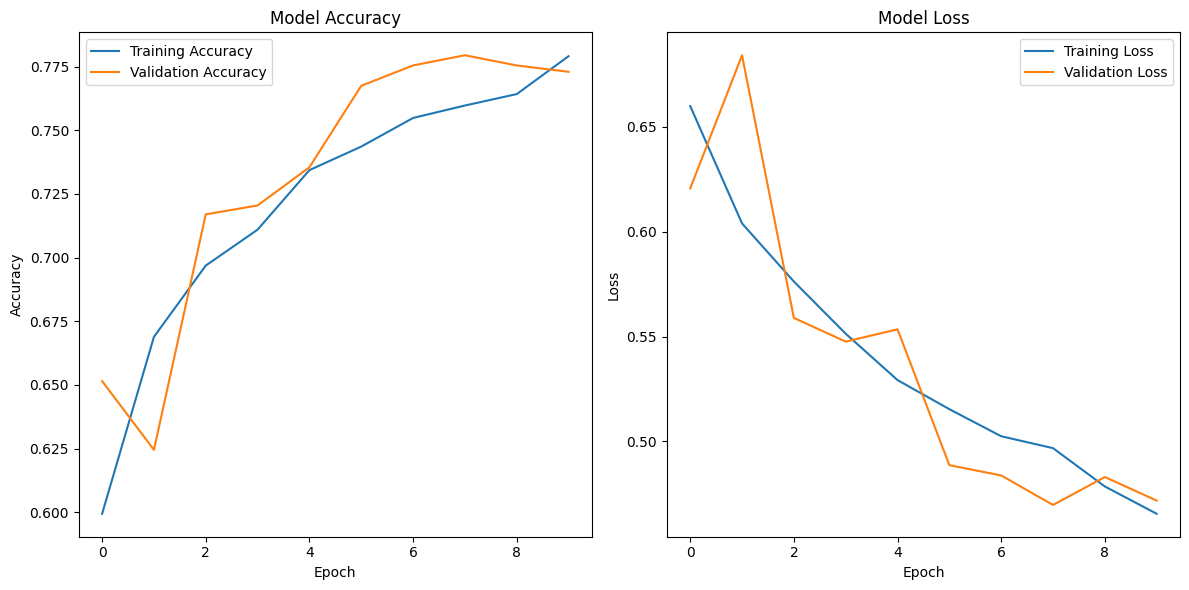

In [13]:
import matplotlib.pyplot as plt

# Getting accuracy and loss information during training
history = cnn.history.history

# Plotting training and validation accuracy curves
plt.figure(figsize=(12, 6))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss curve
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Part 4 - Making a single prediction

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

# load the test image
img_path = './dataset/single_prediction/cat_or_dog_2.jpg'   # 1 is dog, 2 is cat
test_image = image.load_img(img_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)  # Convert to numpy array
test_image = np.expand_dims(test_image, axis=0) / 255.0  # Increase batch dimension and normalize
#Neural network usually wants batch data

# predict
result = cnn.predict(test_image)
if result[0][0] > 0.5:
    print(" ! Dog !")
else:
    print(" ! Cat !")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
 ! Cat !


Github link: https://github.com/Alexjiaobu/Project-CNN-for-Image-Classification.git


Medium link: https://medium.com/@liuxingbei0726/cnn-model-for-image-classification-specifically-distinguishing-between-images-of-cats-and-dogs-713de863eca5